In [25]:
# Importing the libraries
import numpy as np # Maths

# Plot charts
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import pandas as pd # Import/manage datasets

# data processing
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import ElasticNet # machine learning

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error # eval metric

In [13]:
# Importing the datasets
# Train datasets
X = pd.read_csv('../../Data/Regression Models/X_train.csv')
y = pd.read_csv('../../Data/Regression Models/y_train.csv')['PRP']

In [17]:
X.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX
0,125,256,6000,256,16,128
1,29,8000,32000,32,8,32
2,29,8000,32000,32,8,32
3,29,8000,32000,32,8,32
4,26,8000,32000,64,8,32


C:\Users\inspiron\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


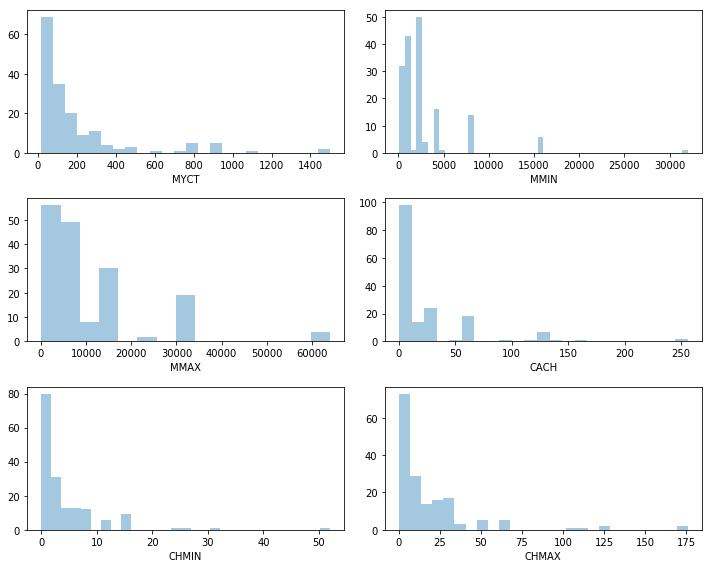

In [18]:
fig, ax = plt.subplots(3,2,figsize=(10,8))
for i,c in enumerate(X):
    sns.distplot(X[c], ax=ax[i // 2][i % 2], kde=False)
fig.tight_layout()

0    198
1    269
2    220
3    172
4    318
Name: PRP, dtype: int64


C:\Users\inspiron\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


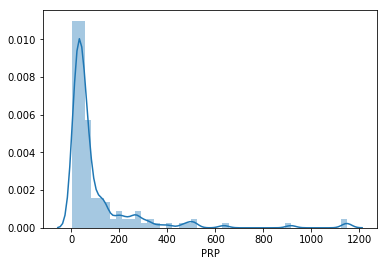

In [19]:
sns.distplot(y)
print(y.head())

In [35]:
# Split the data
X_train, X_val, y_train, y_val = train_test_split(np.array(X), np.array(y), 
                                                     test_size = 0.25, 
                                                     random_state = 2018)

# data preprocessing using sklearn Pipeline
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, interaction_only=True)), # multiply features together
    ('scale', StandardScaler()), # scale data
])

# fit and apply transform
X_train = pipeline.fit_transform(X_train)
# transform the validation set
X_val = pipeline.transform(X_val)
print('train shape:', X_train.shape, 'validation shape:', X_val.shape)

train shape: (126, 22) validation shape: (42, 22)


In [36]:
reg = ElasticNet(alpha=1.7)
reg.fit(X_train, y_train) # magic happens here
y_pred = reg.predict(X_val)
y_pred[y_pred < 0] = 0
print('Model MAE:', mean_absolute_error(y_val, y_pred))
print('Mean  MAE:', mean_absolute_error(y_val, np.full(y_val.shape, y.mean())))

Model MAE: 28.52623014799936
Mean  MAE: 80.968537414966


In [38]:
X_train = pipeline.fit_transform(X)
X_test_last = pipeline.transform(X_test)
reg.fit(X_train, y)
y_pred = reg.predict(X_test_last)
y_pred[y_pred < 0] = 0



C:\Users\inspiron\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


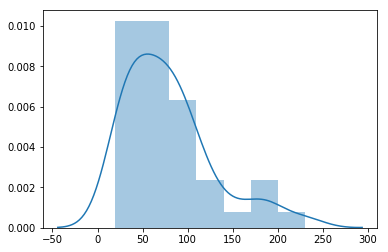

In [40]:
sns.distplot(y_pred)